In [383]:
# Include all the necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# Question 01

In [384]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread("images/emma.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

In [385]:
# Visulaize Image (optional)

# via OpenCV

# cv.namedWindow("images",cv.WINDOW_AUTOSIZE)
# cv.imshow("images",img)
# cv.waitKey(0)
# cv.destroyAllWindows()

# via Matplotlib

# fig,ax = plt.subplots()
# ax.imshow(img,cmap="gray")
# ax.set_title("")
# plt.show()

In [386]:
# Display Image properties (optional)

print(img.shape)
print(img.size)
print(img.dtype)

(810, 720)
583200
uint8


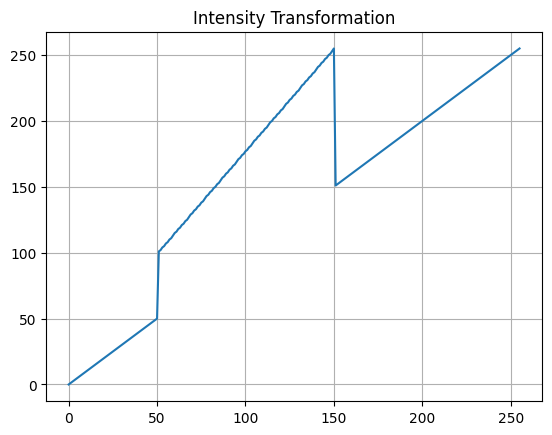

In [387]:
# Create Intensity Transformer with the following characteristics

c= np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
# print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
# print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
# print(len(t3))

# Plot the intensity transformer

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

# print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.grid()
plt.show()

In [388]:
# Perform Transformation and visualize usinf opencv
transformed_image = cv.LUT(img,transform)

In [389]:
# Visualizing Using Open CV

# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",img)
# cv.waitKey(0)

# # Display Transformed Image
# cv.namedWindow("Transformed image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Transformed image",transformed_image)
# cv.waitKey(0)

# cv.destroyAllWindows()

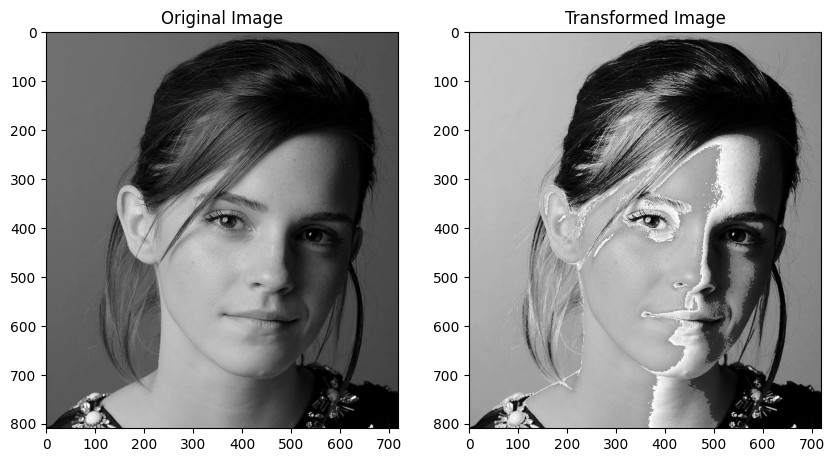

In [390]:
#visualize using matplotlib

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")
plt.show()

# Question 02

In [391]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread("images/BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

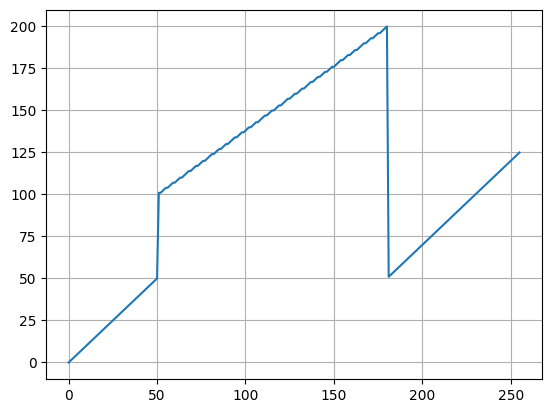

In [392]:
# Enhancing grey matte using intensiy transformations Assuming intensity ranges from 50 to 180 are responsible for the grey matter

c= np.array([(50,50),(50,100),(180,200),(180,50)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
# print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
# print(len(t2))
t3 = np.linspace(c[3,1]+1,125,255-c[3,0]).astype("uint8")
# print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

# print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.grid()
plt.show()


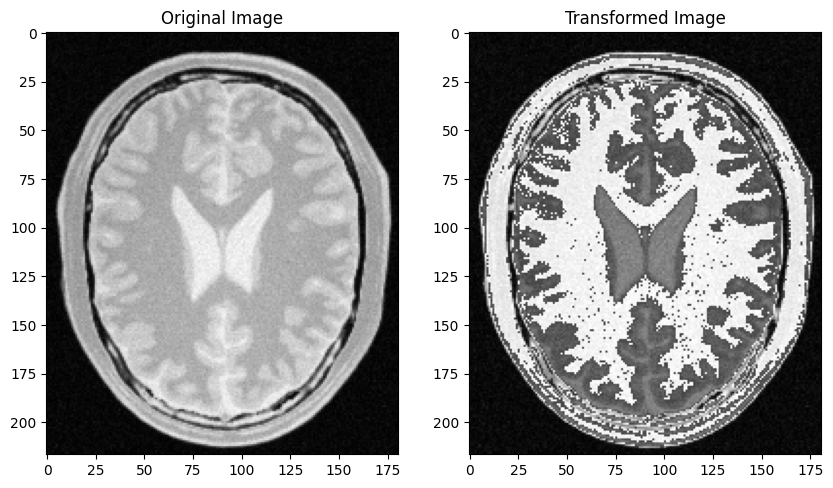

In [393]:
# Perform Transformation and visualize original and transformed images

transformed_image = cv.LUT(img,transform)

# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",transformed_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")

plt.show()

256


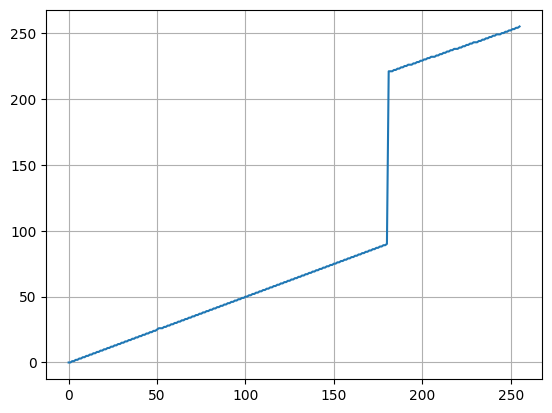

In [394]:
# Enhancing white matter using intensiy transformations. Assuming intensity ranges from 180 to 255 are responsible for the white matter

c= np.array([(50,25),(50,25),(180,90),(180,220)])
t1 = np.linspace(0,c[0,1],c[0,0]+1).astype("uint8")
# print(len(t1))
t2 = np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype("uint8")
# print(len(t2))
t3 = np.linspace(c[3,1]+1,255,255-c[3,0]).astype("uint8")
# print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype("uint8")
transform = np.concatenate((transform,t3),axis=0).astype("uint8")

print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.grid()
plt.show()


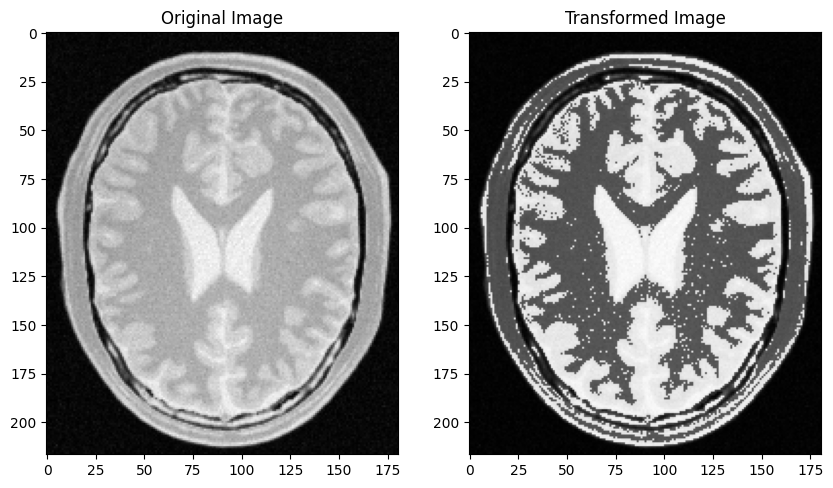

In [395]:
# # Perform Transformation and visualize usinf opencv

transformed_image = cv.LUT(img,transform)

# # Display Original Image
# cv.namedWindow("Original image",cv.WINDOW_AUTOSIZE)
# cv.imshow("Original image",transformed_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(10,8))

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(transformed_image,cmap="gray")
ax[1].set_title("Transformed Image")

plt.show()

# Question 03

In [396]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread("images/highlights_and_shadows.jpg")
assert img is not None, 'Image not found'

In [397]:
def apply_gamma_correction(image_lab, gamma):

    global L,L_corrected
    # Split the LAB image into L*, a*, and b* channels
    L, a, b = cv.split(image_lab)

    # Apply gamma correction to the L* channel
    L_corrected = np.power(L / 255.0, gamma) * 255.0

    # Ensure the corrected L* channel is in the appropriate data range
    L_corrected = np.clip(L_corrected, 0, 255).astype('uint8')

    # Merge the corrected L* channel with the original a* and b* channels
    corrected_lab = cv.merge([L_corrected, a, b])

    

    return corrected_lab

In [398]:
# Convert the image to LAB color space
image_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Set the desired gamma value
gamma = 0.7

# Apply gamma correction to the LAB image
corrected_image_lab = apply_gamma_correction(image_lab, gamma)

# Convert the corrected LAB image back to BGR color space
corrected_image_bgr = cv.cvtColor(corrected_image_lab, cv.COLOR_LAB2BGR)

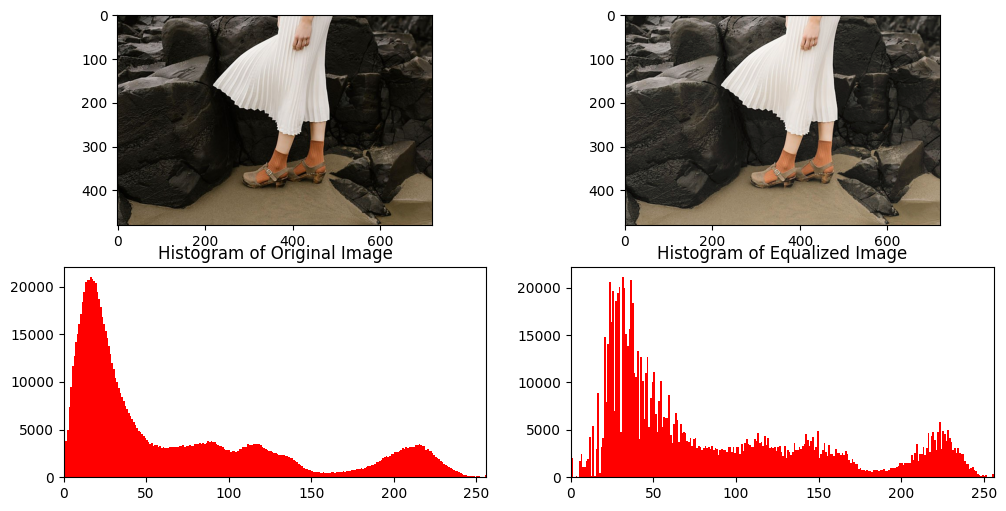

In [399]:
# Visalisng the images

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(corrected_image_bgr, cv.COLOR_BGR2RGB))


ax[1,0].hist(img.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image_bgr.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
ax[1,1].set_title("Histogram of Equalized Image")

plt.show()

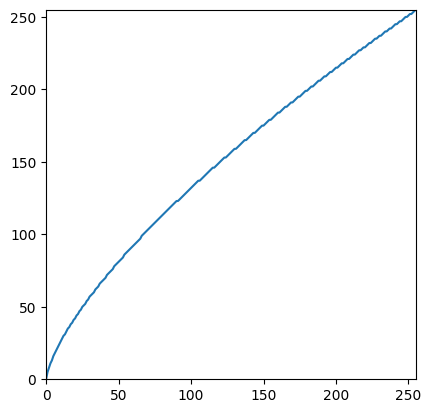

In [400]:
# Visualize the table

table = np.array([(i/255)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')

fig , ax = plt.subplots()

ax.plot(table)
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')


# Question 04

In [401]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread("images/spider.png")
assert img is not None, 'Image not found'

In [402]:

# Convert the image to HSV color space
image_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Spliting image to HSV planes
hue, saturation, value = cv.split(image_hsv)


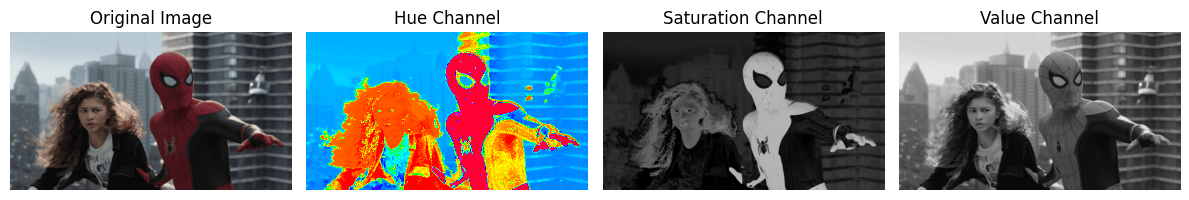

In [403]:
# Display the original BGR image and the HSV channels
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(hue, cmap='hsv', vmin=0, vmax=180)
ax[1].set_title('Hue Channel')

ax[2].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation Channel')

ax[3].imshow(value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [404]:
# Define the Saturation Transformer
def satIntensityTransformer(x,alpha,zigma):
    
    transformer = x +(alpha*128)*np.exp((-(x-128)**2)/(2*(zigma**2)))

    return min(transformer,255)

In [405]:
# Define the new array after transformation
transformed_saturation= np.zeros(saturation.shape)

# perform transformation
for i in range(len(saturation)):
    for j in range(len(saturation[i])):
        transformed_saturation[i][j] = satIntensityTransformer(saturation[i][j],0.7,70)

# make sure the values are in the range of 0 to 255
transformed_saturation=transformed_saturation.astype('uint8')

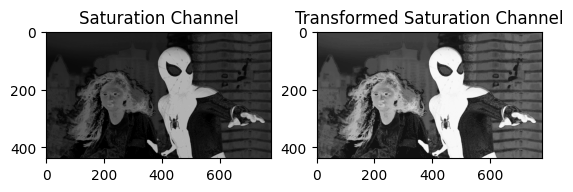

In [406]:
# Visualize the saturation channel before and after transformation
fig, ax = plt.subplots(1,2)

ax[0].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Saturation Channel')

ax[1].imshow(transformed_saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Saturation Channel')

plt.show()

In [407]:
# merging the corrected channels
corrected_hsv = cv.merge([hue, transformed_saturation, value])
corrected_image_hsv = cv.cvtColor(corrected_hsv, cv.COLOR_HSV2BGR)

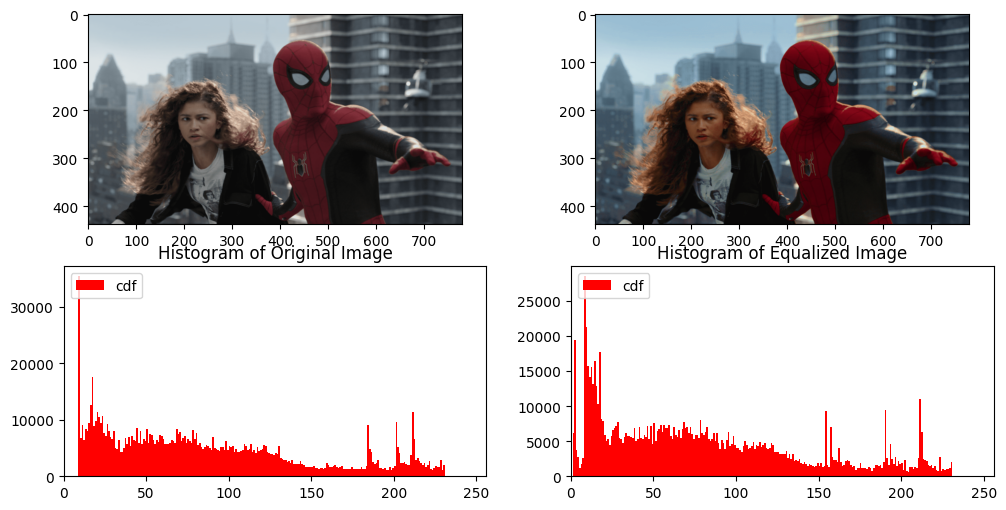

In [408]:
# Visualize the original and corrected images
fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(corrected_image_hsv, cv.COLOR_BGR2RGB))


ax[1,0].hist(img.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
ax[1,0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image_hsv.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
ax[1,1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

plt.show()

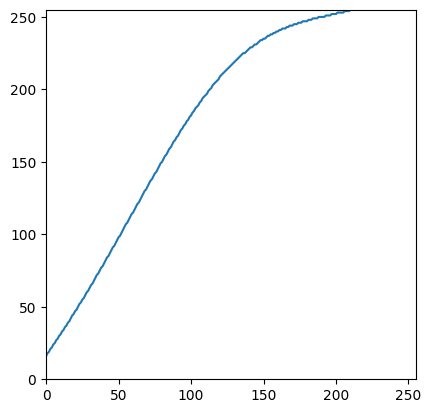

In [409]:
transform = np.array([satIntensityTransformer(i,0.7,70) for i in np.arange(0,256)]).astype('uint8')

fig , ax = plt.subplots()

ax.plot(transform)
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

# Question 05

In [410]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread("images/shells.tif",cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

In [411]:
# Creating Histograms

hist,bins = np.histogram(img.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()

In [412]:
# find probabilities for each intensity level
probabilities = hist / np.sum(hist)

In [413]:
# find cumulative sum of pixels
cumsum=np.zeros(256)

for i in range(len(cumsum)):
    cumsum[i] = np.sum(hist[:i])

In [414]:
equalized_cumsum = np.zeros(256)

for x in range(len(equalized_cumsum)):
    equalized_cumsum[x] = (cumsum[x] * 255) / img.size

In [415]:
equalized_cumsum = equalized_cumsum.astype('uint8')

equalized_image = np.zeros(img.shape)

for i in range(len(img)):
    for j in range(len(img[i])):
        equalized_image[i][j] = equalized_cumsum[img[i][j]]

equalized_image = equalized_image.astype('uint8')

In [416]:
from tabulate import tabulate

# Example arrays
array1 = np.arange(256)
array2 = hist
array3 = probabilities
array4 = cumsum
array5 = equalized_cumsum

# Combine arrays into a list of tuples
combined_data = list(zip(array1, array2, array3,array4,array5))

# Define headers for the columns
headers = ['r_k', 'n_k', 'Pr(r_k)','Cumulative n_k','equalized rounded']

# Print the combined data using tabulate
table = tabulate(combined_data, headers=headers, tablefmt='grid')
print(table)


+-------+-------+-----------+------------------+---------------------+
|   r_k |   n_k |   Pr(r_k) |   Cumulative n_k |   equalized rounded |
+=======+=======+===========+==================+=====================+
|     0 |     0 |  0        |                0 |                   0 |
+-------+-------+-----------+------------------+---------------------+
|     1 |     0 |  0        |                0 |                   0 |
+-------+-------+-----------+------------------+---------------------+
|     2 |     0 |  0        |                0 |                   0 |
+-------+-------+-----------+------------------+---------------------+
|     3 |     0 |  0        |                0 |                   0 |
+-------+-------+-----------+------------------+---------------------+
|     4 |     0 |  0        |                0 |                   0 |
+-------+-------+-----------+------------------+---------------------+
|     5 |     0 |  0        |                0 |                   0 |
+-----

In [417]:
hist,bins = np.histogram(equalized_image.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

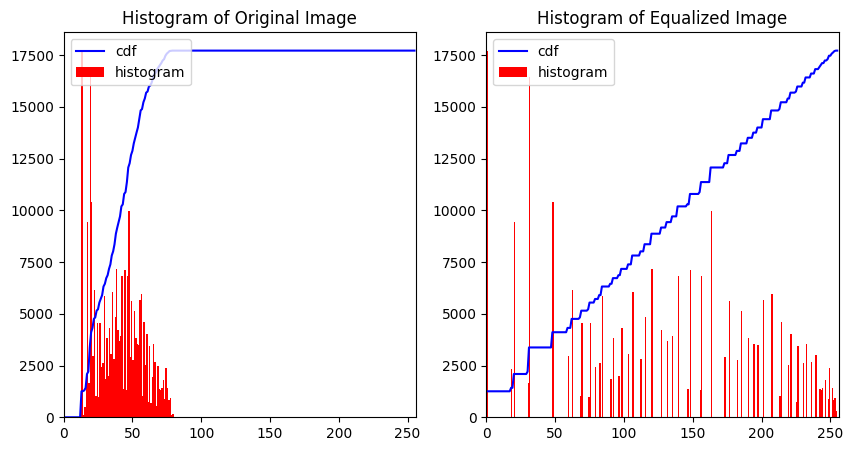

In [418]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(img.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equalized_image.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

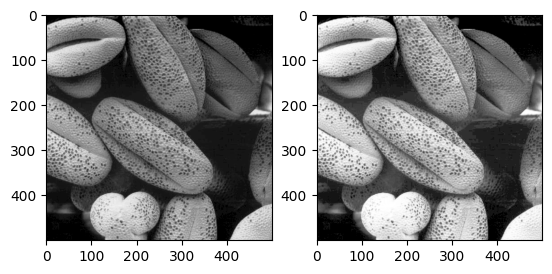

In [419]:
#stacking images side-by-side

fig,ax = plt.subplots(1,2)

ax[0].imshow(img,cmap="gray")
ax[1].imshow(equalized_image,cmap="gray")

plt.show()

__OPTIONAL METHOD__

In [420]:
############### OPTIONAL METHOD #####################

#Creating Histograms
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

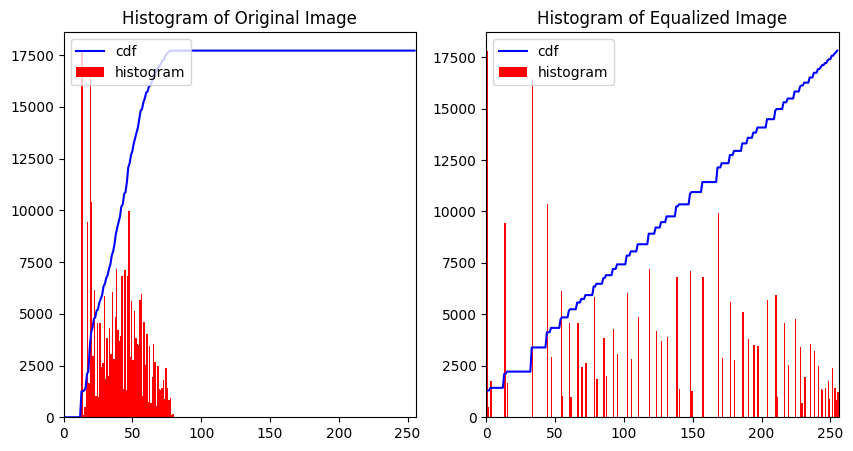

In [421]:
# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(img.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

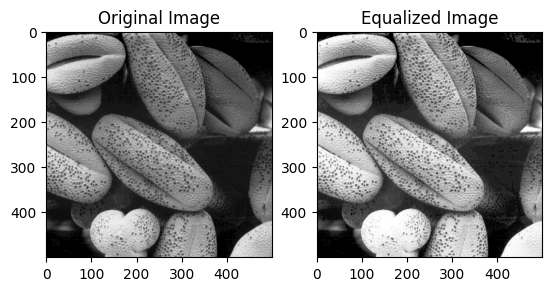

In [422]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(img,cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(equ,cmap="gray")
ax[1].set_title("Equalized Image")

plt.show()

# method 2

# res=np.hstack((img,equ)) #stacking images side-by-side
# plt.axis('off')
# plt.imshow(res,cmap="gray")
# plt.show()

# Question 06

In [457]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread("images/jeniffer.jpg",cv.IMREAD_ANYCOLOR)
assert img is not None, 'Image not found'

In [458]:
# Convert the image to HSV color space
image_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue, saturation, value = cv.split(image_hsv)

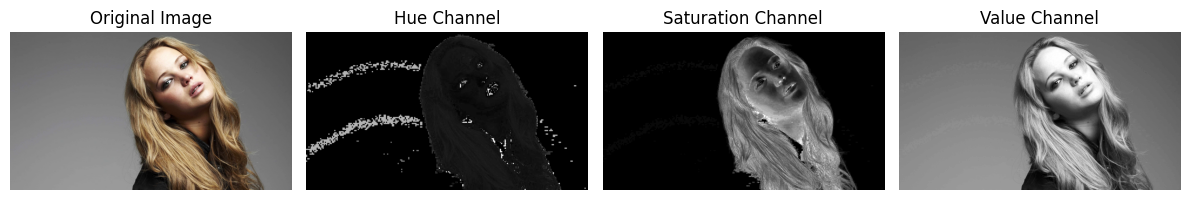

In [459]:
# Display the original BGR image and the HSV channels
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(hue, cmap='gray', vmin=0, vmax=180)
ax[1].set_title('Hue Channel')

ax[2].imshow(saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation Channel')

ax[3].imshow(value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value Channel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [486]:
# Defining the mask

threshold_value = 11
_,foreground_mask = cv.threshold(saturation, threshold_value, 255, cv.THRESH_BINARY)

foreground_mask = cv.morphologyEx(foreground_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (80, 80)))

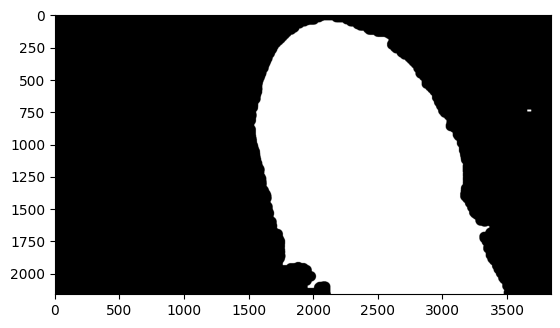

In [487]:
# Visulaize the mask
fig,ax=plt.subplots()
ax.imshow(foreground_mask,cmap="gray")
plt.show()

In [488]:
# Perform the masking operation using bitwise_and function
foreground = cv.bitwise_and(img, img,mask=foreground_mask)

# Convert the foreground to grayscale for histogram calculation
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

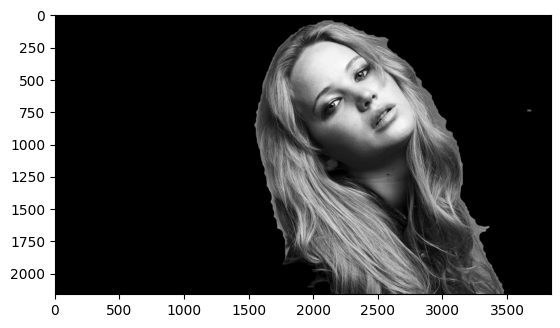

In [489]:
# Display the foreground
fig,ax=plt.subplots()
ax.imshow(foreground_gray,cmap="gray")
plt.show()

In [490]:
#Creating Histograms
hist,bins = np.histogram(foreground_gray.ravel(),256,[0,256])
cdfa = hist.cumsum()
cdfa_normalized = cdfa * hist.max()/ cdfa.max()


# Histogram Equalization
equ = cv.equalizeHist(foreground_gray)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdfb = hist.cumsum()
cdfb_normalized = cdfb * hist.max()/ cdfb.max()

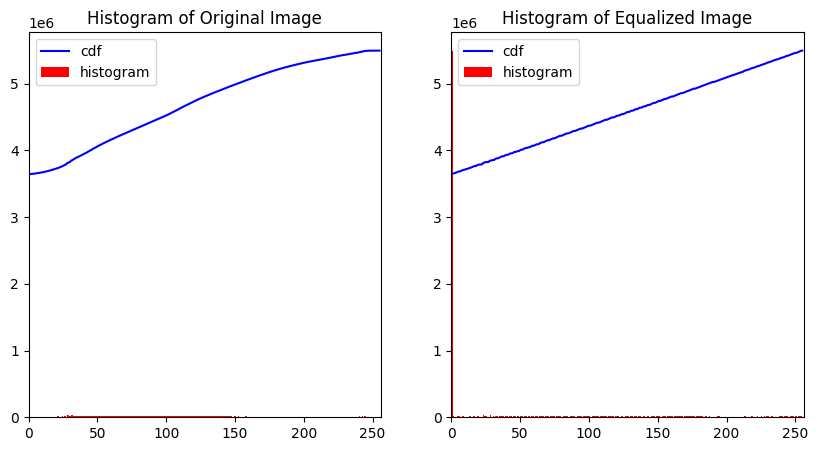

In [491]:
# Displaying the Histograms
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(cdfa_normalized, color = 'b')
ax[0].hist(foreground_gray.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0,256])
ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].plot(cdfb_normalized, color = 'b')
ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0,256])
ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Equalized Image")

plt.show()

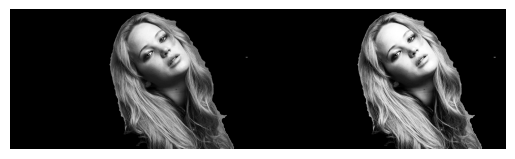

In [492]:
 #stacking images side-by-side

res=np.hstack((foreground_gray,equ))
plt.axis('off')
plt.imshow(res,cmap="gray")
plt.show()

In [493]:
# Extract the background
gray_image = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
background_image = gray_image - foreground_gray

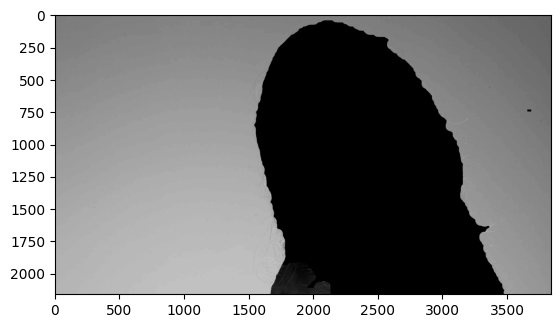

In [494]:
# Visualize the bacqkground

fig,ax=plt.subplots()
ax.imshow(background_image,cmap="gray")
plt.show()

In [495]:
# Add the backgorund to the equalized foreground
corrected_image = background_image + equ

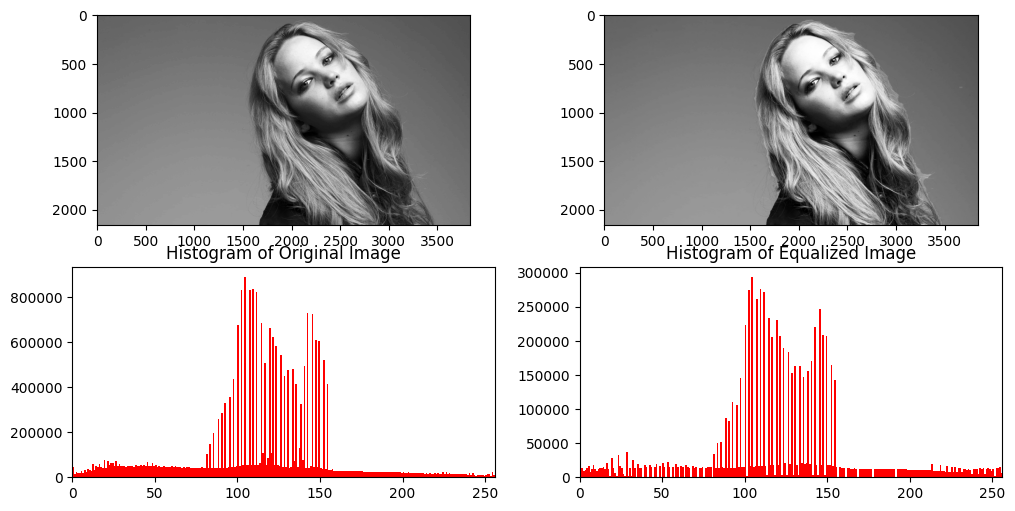

In [500]:
# Visualize the corrected image

fig, ax = plt.subplots(2,2,figsize=(12,6))

ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY),cmap = "gray")
ax[0,1].imshow(cv.cvtColor(corrected_image,cv.COLOR_GRAY2RGB),cmap = "gray")


ax[1,0].hist(img.flatten(),256,[0,256], color = 'r')
ax[1,0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[1,0].set_title("Histogram of Original Image")

# ax[1].plot(cdfb_normalized, color = 'b')
ax[1,1].hist(corrected_image.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1,1].set_title("Histogram of Equalized Image")

plt.show()

# Question 07

In [501]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread('images/einstein.png',cv.IMREAD_GRAYSCALE)
assert img is not None, 'Image not found'

In [502]:
# Creating the kernel(2d convolution matrix)
kernel1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
  
# Applying the filter2D() function
img_filtered = cv.filter2D(img,-1,kernel1)

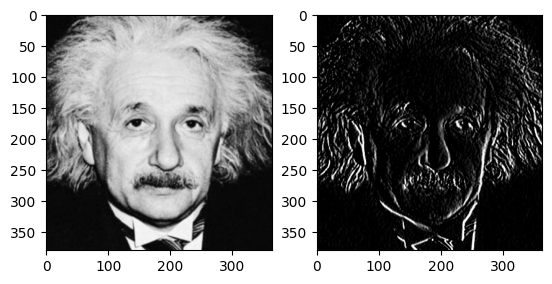

In [503]:
# Visualize the image
 
fig,ax = plt.subplots(1,2)

ax[0].imshow(img,cmap='gray')
ax[1].imshow(img_filtered,cmap='gray')

plt.show()

In [504]:
# Sobel kernels
sobel_kernel_x = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])


# Convolution operation
gradient_x = np.zeros_like(img, dtype=float)


for y in range(1, img.shape[0] - 1):
    for x in range(1, img.shape[1] - 1):
        window = img[y-1:y+2, x-1:x+2]
        gradient_x[y, x] = np.sum(window * sobel_kernel_x)

# Compute gradient magnitude
gradient_magnitude = np.abs(gradient_x)
# gradient_magnitude = (gradient_magnitude / np.max(gradient_magnitude)) * 255 
gradient_magnitude = gradient_magnitude.astype(np.uint8)

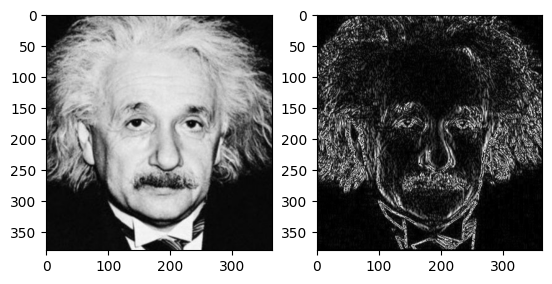

In [505]:
# Visualize the image

fig,ax = plt.subplots(1,2)

ax[0].imshow(img,cmap='gray')
ax[1].imshow(gradient_magnitude,cmap='gray')

plt.show()

In [508]:
# Defining the kernels
kernel1 = np.array([[1], [2], [1]])
kernel2 = np.array([[1, 0, -1]])

# Applying the convolutions
# kernel = kernel1 * kernel2
conv = cv.filter2D(img, cv.CV_64F, kernel1)
conv = cv.filter2D(conv, cv.CV_64F , kernel2)

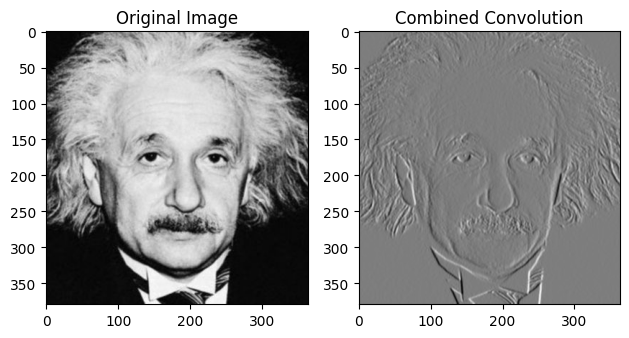

In [509]:
# Visualize the image

fig, ax = plt.subplots(1, 2,)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(conv, cmap='gray')
ax[1].set_title('Combined Convolution')

plt.tight_layout()
plt.show()

# Question 08

In [444]:
#import image for question 01 as grayscale image and display it using openCV 

img = cv.imread('images/zooming/im01small.png')
assert img is not None, 'Image not found'

In [445]:
def zoom_nearest_neighbor(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = int(i / factor)
            orig_j = int(j / factor)
            zoomed_image[i, j] = image[orig_i, orig_j]
    
    return zoomed_image

def zoom_bilinear(image, factor):
    h, w, _ = image.shape
    new_h = int(h * factor)
    new_w = int(w * factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            orig_i = i / factor
            orig_j = j / factor
            
            i1, i2 = int(np.floor(orig_i)), int(np.ceil(orig_i))
            j1, j2 = int(np.floor(orig_j)), int(np.ceil(orig_j))
            
            i1 = max(0, min(i1, h - 1))  # Ensure indices stay within image boundaries
            i2 = max(0, min(i2, h - 1))
            j1 = max(0, min(j1, w - 1))
            j2 = max(0, min(j2, w - 1))
            
            # Bilinear interpolation
            value = (1 - (orig_i - i1)) * (1 - (orig_j - j1)) * image[i1, j1] + \
                    (1 - (orig_i - i1)) * (orig_j - j1) * image[i1, j2] + \
                    (orig_i - i1) * (1 - (orig_j - j1)) * image[i2, j1] + \
                    (orig_i - i1) * (orig_j - j1) * image[i2, j2]
            
            zoomed_image[i, j] = value.astype(np.uint8)
    
    return zoomed_image


In [446]:
# Zoom factor
zoom_factor = 2  # Change this to the desired zoom factor

# Zoom using nearest-neighbor
zoomed_nn = zoom_nearest_neighbor(img, zoom_factor)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_bilinear(img, zoom_factor)

In [447]:
# Visualize the images
cv.namedWindow('Original Image', cv.WINDOW_AUTOSIZE)
cv.namedWindow('Zoomed (Nearest Neighbor)', cv.WINDOW_AUTOSIZE)
cv.namedWindow('Zoomed (Bilinear Interpolation)', cv.WINDOW_AUTOSIZE)

cv.imshow('Original Image', img)
cv.imshow('Zoomed (Nearest Neighbor)', zoomed_nn)
cv.imshow('Zoomed (Bilinear Interpolation)', zoomed_bilinear)

cv.waitKey(0)
cv.destroyAllWindows()

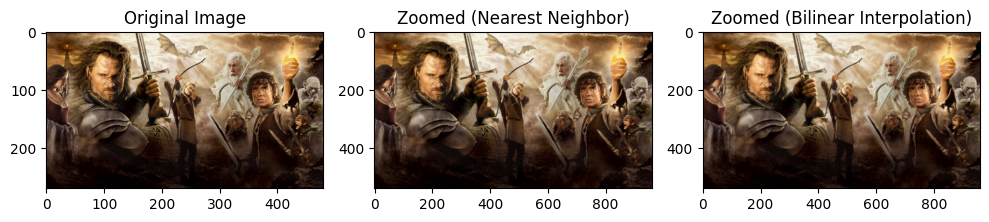

In [448]:
# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
plt.title('Zoomed (Nearest Neighbor)')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
plt.title('Zoomed (Bilinear Interpolation)')

plt.tight_layout()
plt.show()


In [449]:
small_image = cv.imread('images/zooming/im01small.png')
original_image = cv.imread('images/zooming/im01.png')

# Zoom factor
scale_factor = 4.0

scaled_nn = zoom_nearest_neighbor(small_image, scale_factor)
scaled_bilinear = zoom_bilinear(small_image, scale_factor)

ssd_nn = np.sum((scaled_nn - original_image)**2)
ssd_bilinear = np.sum((scaled_bilinear - original_image)**2)

# Normalize the SSD values
normalized_ssd_nn = ssd_nn / (original_image.shape[0] * original_image.shape[1])
normalized_ssd_bilinear = ssd_bilinear / (original_image.shape[0] * original_image.shape[1])

# Print the normalized SSD values
print(f"Normalized SSD (Nearest Neighbor): {normalized_ssd_nn}")
print(f"Normalized SSD (Bilinear Interpolation): {normalized_ssd_bilinear}")

Normalized SSD (Nearest Neighbor): 93.85294945987654
Normalized SSD (Bilinear Interpolation): 117.77109953703703


# Question 09

In [450]:
# Insert the required image
image = cv.imread('images/flower.jpg')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

In [451]:
# Initialize the mask (1s for sure foreground, 0s for sure background)
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangular region of interest for initial segmentation
rect = (35, 35, image.shape[1] - 25, image.shape[0] - 25)

In [452]:
# Apply grabCut algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
# Modify the mask to create a binary foreground mask
foreground_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

In [453]:
# Extract foreground and background images
foreground_image = image * foreground_mask[:, :, np.newaxis]
background_image = image * (1 - foreground_mask[:, :, np.newaxis])

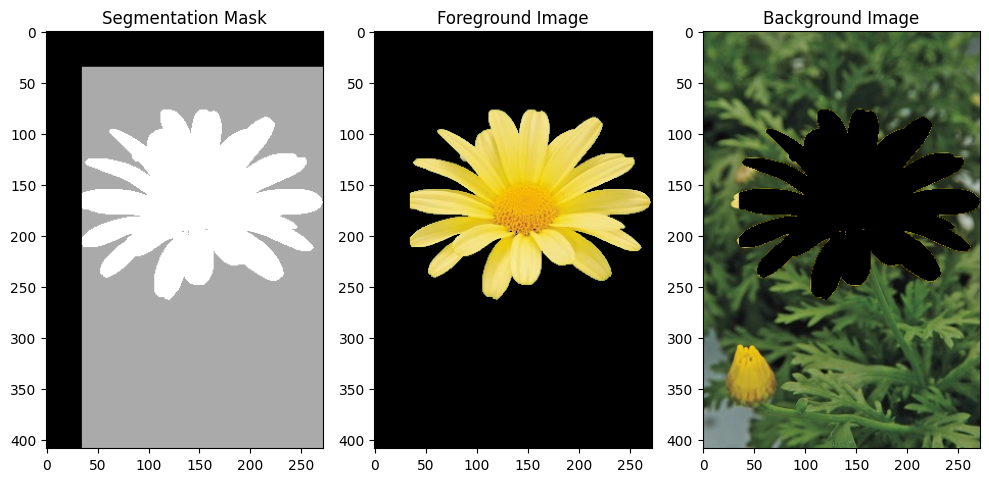

In [454]:
# Display the segmentation results
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')

plt.subplot(132)
plt.imshow(foreground_image)
plt.title('Foreground Image')

plt.subplot(133)
plt.imshow(background_image)
plt.title('Background Image')

plt.tight_layout()
plt.show()

In [455]:
# Apply Gaussian blur to the background image
blurred_background = cv.GaussianBlur(background_image, (21, 21), 0)

# add blurred background and foreground images
final_image = foreground_image + blurred_background

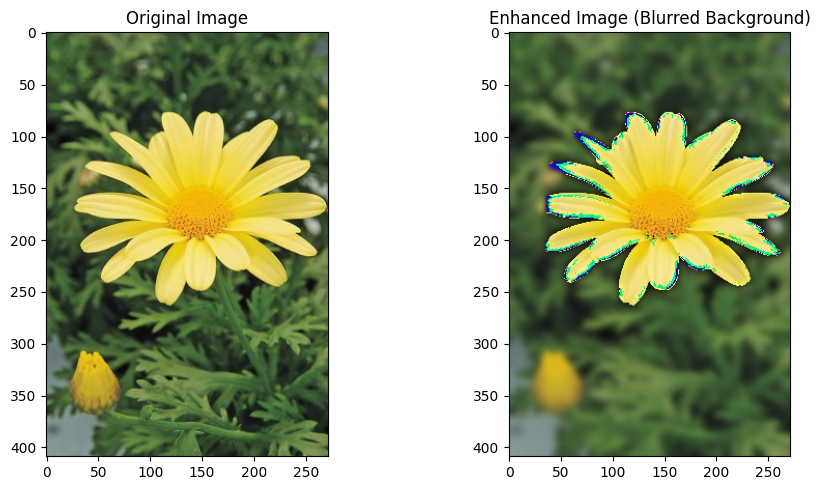

In [456]:
# Display the original and enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(final_image)
plt.title('Enhanced Image (Blurred Background)')

plt.tight_layout()
plt.show()